## L3: Mass transport and Membrane Biophysics
### Live Session

In this live session we will cover the same topics that were covered in the L2 pre-recorded lecture, i.e., some physical chemistry and membrane biophysics. However, this session will be a lot more hands on, and you will get a chance to do some coding to implement and solve some of the models we have covered.

### Example 1: Setting up and solving an ODE system with Python

The first topic we cover is the law of mass action, which we covered in the recorded lecture. We will now repeat how we can set up an ODE system, and I'll show you how you can solve the ODE system using Python. To solve the equations numerically, we will use the function [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). The name `solve_ivp` is short for "solve initial value problem", which is another way of describing the mathematical problem we are looking at. If you normally use another programming language, such as Matlab, similar functions are available there.

If you have never solved ODE systems numerically, and you want to understand the process in detail, we recommend the (short) book *Finite Difference Computing with Exponential Decay Models* by Professor Hans Petter Langtangen, which is open access and can be [downloaded free of charge from Springer.](http://www.springer.com/us/book/9783319294384) This books gives a thorough and detailed introduction to solving ODE systemts numerically, and even has a subchapter on modelling chemical reactions, i.e., the exact same problems we will be solving here.

I will show an example were we cover the uni-directional binding equation of myoglobin binding to oxygen, and then you'll solve the bidirectional system after.

### ODE System

The chemical reaction I am looking at is
\begin{equation}
\label{eq:myoglobin_one_way}
\mathrm{Mb} + \mathrm{O_2} \overset{k}{\longrightarrow} \mathrm{MbO_2}.
\end{equation}

Our ODE system was given by the Law og Mass Action
$$\begin{align}
\frac{\mathrm{d [Mb O_2]}}{\mathrm{d}t} = k\mathrm{[Mb]}\mathrm{[O_2]}, \qquad 
\frac{\mathrm{d [Mb]}}{\mathrm{d}t} = -k\mathrm{[Mb]^2}\mathrm{[O_2]}, \qquad
\frac{\mathrm{d [O_2]}}{\mathrm{d}t} = -k\mathrm{[Mb]^2}\mathrm{[O_2]}.
\end{align}
$$

#### Explanation of `solve_ivp`

For the function `solve_ivp` to be able to solve the system, it needs three inputs:
1. The ODE system itself, i.e., the equations.
2. The initial values of each state.
3. What time points to solve for.

The specify the ODE equations themselves, we implement them as a Python function. More specifically, we write out the derivatives of the system as a vector equation on the form
$$\frac{{\rm d}\vec{y}}{{\rm d}t} = \vec{f}(t, {\vec y}).$$
Here, $y$ is a single variable (scalar) if you have a single ODE, or a sequence of variables if you have a system of ODEs. These variables are often referred to as the *state* variables or simply *states* of the system. 
In our example, it would for example be
$$\vec{y} = (\mathrm{[Mb]}, \mathrm{[O_2]}, \mathrm{[MbO_2]}).$$
In addition, the function $f$ takes in the time $t$.

The function $\vec{f}$ should now represent the right-hand side of the ODE-system, i.e., the derivative of each state in the system. In our case, this would be
$$\vec{f}(t, \vec{y}) = \bigg(\frac{\mathrm{d [Mb]}}{\mathrm{d}t},  \frac{\mathrm{d [O_2]}}{\mathrm{d}t}, \frac{\mathrm{d [Mb O_2]}}{\mathrm{d}t}\bigg).$$
Note that the order you list the states is not important, but it **is** important that the order you place them in is the same for the vector $y$ and the RHS.


#### Implementing the RHS

The next step is now to implement the function $\vec{f}(t, \vec{y})$ as a Python function. As `f` is not a very descriptive variable name, we instead choose to name the function `rhs`


In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Implement the right-hand-side of the system as a function
def rhs(t, y, k):
    Mb, O2, MbO2 = y

    dMb_dt = -k*Mb*O2
    dO2_dt = -k*Mb*O2
    dMbO2_dt = k*Mb*O2
    
    return (dMb_dt, dO2_dt, dMbO2_dt)

There are three things to note in this example code:

1. The argument `y` here represents a sequence of the model states. To increase readability, we choose to split it into the three states. Likewise, we compute the three derivatives, and chain them together as we return the computed values.
2. We pass the parameter $k$ directly into the `rhs` function, this is technically optional, but we do it so it can be easily adjusted later, instead of letting it just be a global parameter.
3. The derviatives in our example do not directly depend on the time $t$. However, for `solve_ivp` to accept the function, we still need to include it in the function signature.

### Parameters and time 

In addition to defining the ODE system itself, we need to supply information about what times to solve the equations for, as well as the initial conditions. This is supplied directly to `solve_ivp`, which has the call signature
* ``solve_ivp(rhs, timespan, y0)``

Here `rhs` is the function we just defined, `timespan` is the first and last time point to solve for, and `y0` a vector of the initial values of all states. Two useful optinal arguments we can use are: 
1. `t_eval` specifies a whole array of time points to solve for, giving more control than just showing the endpoints
2. `max_step` sets the max allowed time step, which can be useful for stiff equations (like many of those solved in this school!)
2. `args` is used to pass any additional parameters to the `rhs`, in this case `k`.

For this example, let us set $k=10$, and solve for $t\in(0, 10)$, with a time step of $\Delta t =0.1$. For the initial condition we can let $[\rm Mb]_0 = 1$, $[\rm O_2]_0 = 1$ and $[\rm Mb O_2] = 0.$

In [3]:
# Choose what time interval to solve other
time = (0, 5)

# Define the initial condition
y0 = (1.0, 1.0, 0.0)

# Define any extra parameters of the ODE system
k = 10
params = (k,)

# Call the ODE solver
solution = solve_ivp(rhs, time, y0, args=params, max_step=0.01)

Note especially that even though we have a single parameter, the parameter variable we send in to the argument `args` has to be a sequence, so we make it into a vector with a single element with `(k,)`, if we had multiple parameters it could be for example `(k1, k2)`.

The code above solves the ODE system for us and returns the solution as so-called "bunch"-variable. If you print it out, you can see everything it contains.


In [4]:
print(solution)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 3014
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.41279935e-04, 1.55407929e-03, 1.15540793e-02,
       2.15540793e-02, 3.15540793e-02, 4.15540793e-02, 5.15540793e-02,
       6.15540793e-02, 7.15540793e-02, 8.15540793e-02, 9.15540793e-02,
       1.01554079e-01, 1.11554079e-01, 1.21554079e-01, 1.31554079e-01,
       1.41554079e-01, 1.51554079e-01, 1.61554079e-01, 1.71554079e-01,
       1.81554079e-01, 1.91554079e-01, 2.01554079e-01, 2.11554079e-01,
       2.21554079e-01, 2.31554079e-01, 2.41554079e-01, 2.51554079e-01,
       2.61554079e-01, 2.71554079e-01, 2.81554079e-01, 2.91554079e-01,
       3.01554079e-01, 3.11554079e-01, 3.21554079e-01, 3.31554079e-01,
       3.41554079e-01, 3.51554079e-01, 3.61554079e-01, 3.71554079e-01,
       3.81554079e-01, 3.91554079e-01, 4.01554079e-01, 4.11554079e-01,
       4.21554079e-01, 4.31554079e-01, 

To make this easier to work with, we can extract the time points the solutions are solved for, and the three states of the solution, as follows

In [5]:
# Extract t and y arrays from solution variable
t = solution.t
y = solution.y

# Split up into individual states
Mb, O2, MbO2 = y

We are now ready to plot and look at our solutions

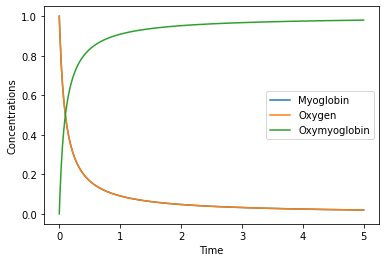

In [6]:
plt.plot(t, Mb, label='Myoglobin')
plt.plot(t, O2, label='Oxygen')
plt.plot(t, MbO2, label='Oxymyoglobin')

plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()
plt.show()

Note that one line is not visible because the curves for oxygen and myoglobin overlap completely. If you choose different initial conditions, it will become visible.

From our resulting plot we can now see how the reaction occurs very swiftly during the first few milliseconds, but then subsides as the reactants start to run out. As the system is unidirectional, all the myoglobin and oxygen gets used up and binds into oxymyoglobin. 

If we now want to explore our system, we would most likely want to change the time domain, the initial conditions or the parameters of the system. You can go back and change these manually and then rerun and replot the solution. If you plan to do it many times, it might be more systematic to define a function that does everything, for simplicity and order.

In [7]:
def binding_reaction(k=1.0, Mb_0=2.0, O2_0=1.0):
    """Model the chemical reaction for given set of parameters and initial conditions"""
    t = (0, 5)
    y0 = (Mb_0, O2_0, 0)

    solution = solve_ivp(rhs, time, y0, args=(k,), max_step=0.1)
    t = solution.t
    Mb, O2, MbO2 = solution.y
    
    plt.plot(t, Mb, label='Myoglobin')
    plt.plot(t, O2, label='Oxygen')
    plt.plot(t, MbO2, label='Oxymyoglobin')
    
    plt.axis((0, 5, 0, 3))
    plt.xlabel('Time')
    plt.ylabel('Concentrations')
    plt.legend()
    plt.show()       

We have now made a function that resolves the problem and plots the solution for different choices of parameters or initial conditions. This makes it easier to run the model under different conditions.

#### The Jupyter Notebook Widget

If you define a function that both solves and plots an ODE system you can also use a nice functionality in Jupyter: *interactive widgets*. These let you study the system a little more dynamically. In the code cell below, we create an interactive widget where we can use sliders to change the reaction rate $k$ or the initial conditions. Every time you drag one of the sliders, the system is resolved and replotted using the new values.

In [8]:
from ipywidgets import interact, FloatSlider

interact(binding_reaction, 
         k=(0, 2.5, 0.1), 
         Mb_0=(0, 3, 0.25),
         O2_0=(0, 3, 0.25));

interactive(children=(FloatSlider(value=1.0, description='k', max=2.5), FloatSlider(value=2.0, description='Mb…

In the coming sessions we will often use these widgets to explore some dynamic system interactively, and show of concepts. Often the code to produce these widgets will be in separate files, and we simply import them into the notebook - this is mainly done to keep the notebooks from becoming too cluttered with setup code. If you are curious to see the code underlying any widget in the course, you can always look up the source file.

### Exercise 1: Modeling a bidirectional reaction

Modeling the bidirectional reaction of oxygen binding to myoglobin will be almost identical to the one-way reaction we already looked at. The derivatives of the system are slightly more complex, as each derivative now consists of two terms, instead of one. However, the underlying principles, and the code needed to solve the ODE system is almost identical.

It is now your turn to try to set up the ODE system, and solve it using Python. Take a look at section two of the accompanying notebook:
* <a href="E2 - Exercises on Physical Chemistry.ipynb#equilibrium">Exercise 1: Modeling a Two-way Reaction to Understand Equilibrium</a>

<a id="enzymes"></a>
## Enzyme Kinetics and the Michaelis-Menten equation

We will now turn to a topic that builds naturally from the law of mass action, which is enzyme kinematics. Enzymes are proteins that act as catalysts for biochemical reactions, meaning they speed up the reactions, without being consumed in the process. There are many different mechanisms for how an enzyme can achieve this, but we won't go into these details. Instead we want to look at a simplified and understandable model of how enzymes work.

Enzymes generally work by somehow lowering the energy barrier of a chemical reaction. This can for example be achieved by binding to an intermediate state in the reaction. Recall now Arrhenius' law, which stated that the rate constant of a reaction could be written as
$$k = Ae^{-E_{\rm barrier}/k_{\rm B}T}.$$
This relation tells us that the rate of a reaction is proportional to the exponential of the activation energy. Thus, even a relatively small reduction in the energy barrier of a given reaction can cause a huge change in reaction speed. Because of this, enzymes are usually highly efficient and can speed up reactions by many orders of magnitude ($>10^7$ in some cases!). 

<img src="fig/activation_barrier_enzyme.png" width=400>

The drastic change in reaction speed due to enzymes is hugely important for cellular function. We can effectively have reacting systems in the cell that have a rate so slow that they are effectively stable, but as soon as a bit of enzyme is added, things start happening. In this sense, enzymes can be thought of as on-buttons for various processes in the cell that are lying in standby. An example of this is the energy carrier molecules ATP. These molecules carry a fair bit of chemical energy, and so will spontaneously dissociate and release energy. However, the rate of this dissociation is very slow, and so it takes a very long time for ATP to dissociate on its own. The cell can therefore produce ATP through metabolism and let it sit for a while, without fear of wasting energy. Molecular machines can now be equipped with enzymes that speed up the dissociation of ATP, harnessing some of the released energy in the process. These enzymatic machines are known as *ATPases*, and we will see some of examples of these later in the course.

#### Enzymes change reaction speed, not direction

It is important to note that an enzyme can never change the net change in Gibb's energy in a reaction, and will therefore never be able to change the direction of a reaction. An enzyme cannot trigger a reaction that is not spontaneous on its own, it can just speed it up. The upside however, is that the enzyme molecules doesn't get used up in the reaction, and therefore even a small amount of enzyme is usually enough to trigger some process.

<a id="michaelismenten"></a>
### Modeling enzymatic reaction

The exact action of enzymes can vary a lot, and can be challenging to explore properly due to their specific nature and the complexity of large proteins. For example, the exact way the enzyme *catalase* works remains elusive, despite it being common to more or less all life that processes oxygen. So we won't try to model *how* an enzyme works, but instead what it does.

We will now look at how we can model the activity of an enzyme with a simple model. While simple, this model is incredibly useful, and sees a  lot of use in physiological modeling. As it is a simplified model with some underlying assumptions, it is often referred to as first-order kinetics.

Enzymes work by binding to some molecule, the *substrate*, converting it, and then releasing the *product*. We therefore propose the following reaction to model this activity
$${\rm S} + {\rm E} \underset{k_{-1}}{\overset{k_1}{\rightleftharpoons}} {\rm ES} \overset{k_2}{\rightarrow} {\rm E} + {\rm P}.$$
Here S is the substrate that is to be converted and E is the enzyme, these can bind together and form an enzyme-substrate complex, ES. The ES complex can either break up again without converting the substrate, or the substrate can be converted and the complex breaks up into a free enzyme molecule and a product molecule, P. We assume that once the product has been released by the enzyme, it no longer binds to the enzyme spontaneously, so there is no reverse arrow in the final reaction.

We want to find the rate at which the product is made, i.e., the time derivative $\dot{[{\rm P}]}$. We will call this rate the 'reaction velocity' $v$. Luckily, the law of mass action applies to each concentration separately, so looking at the reaction equation, we can write this out as
$$v = \dot{[{\rm P}]} = k_2[{\rm ES}],$$
as you can see, to compute an actual value, we first need to find an expression for $[ES]$. We start using the law of mass action for $E$:
$$[\dot{{\rm E}}] = (k_{-1} + k_2)[{\rm ES}] - k_1[{\rm S}][{\rm E}].$$
To go further, we will make an assumption that the system will quickly reach an equilibrium where the ratio of bound and unbound enzyme is constant, and so $[{\rm E}]$ will be constant. Such an assumption is sometimes referred to as *quasistatic*. This means we can set the derivative to zero to get
$$(k_{-1} + k_2)[{\rm ES}] = k_1[{\rm S}][{\rm E}].$$
The enzyme doesn't get "used up", so the total amount of enzyme is constant over time, so we can eliminate $[E]$ using the relation $[E] + [{\rm ES}] = [{\rm E}]_{\rm tot}$, giving
$$(k_{-1} + k_2)[{\rm ES}] = k_1[S]([{\rm E}]_{\rm tot} - [{\rm ES}])$$
Solving for $[{\rm ES}]$ gives
$$[{\rm ES}] = \frac{k_1[{\rm S}][{\rm E}]_{\rm tot}}{k_{-1} + k_2 + k_1[{\rm S}]}$$

Going back and inserting this into the reaction velocity gives
$$v = \frac{k_1 k_2 [{\rm S}][{\rm E}]_{\rm tot}}{k_{-1} + k_2 + k_1[{\rm S}]}.$$
This might look very messy, but remember that most of these are just constants, which we can recombine to simplify things. Defining $v_{\rm max} \equiv k_2[{\rm E}]_{\rm tot}$ gives
$$v = v_{\rm max} \frac{k_1 [{\rm S}]}{k_{-1} + k_2 + k_1[{\rm S}]}.$$
Next we divide by $k_1$ in the fraction and define $K_{m} = (k_{-1} + k_2)/k_1$, giving
$$v = v_{\rm max} \frac{[{\rm S}]}{K_m + [{\rm S}]}.$$
Note that $K_m > 0$, so that $[{\rm S}]/(K_m + [{\rm S}])<1$, meaning the reaction velocity can be in the range $[0, v_{\rm max}]$.

If $[S] = K_m$, we get $v = v_{\rm max}/2$, thus $K_m$ can be thought of as the point where the enzyme is half-saturated.

The model we have just derived is known as Michaelis-Menten kinetics. It works very well for a broad range of enzymes. The cases were it might not work that well are cases where we have several different substrates. Single substrate cases are usually assumed to follow Michaelis-Menten kinetics.

Also, take a note to compare the Michaelis-Menten kinetics with the hill equation. Note how similar these are. In fact, the Michaelis-Menten equation is a special case of the Hill equation where $n=1$, meaning we assume there is no cooperativity involved.

### Enzyme Inhibition

Another class of molecules are the enzyme *inhibitors*. These are molecules that reduce, or completely shut of, the activity of enzymes. There are different functional ways for inhibitors to work, but the simplest mechanism is simply binding to enzyme more readily than the actual substrate, but then not actually converting to anything. Thus the enzymes waste their binding time on the inhibitors rather than the substrate. Enzyme inhibition is another important tool in the cell for regulating behavior, and many drugs are enzyme inhibitors. An example of this is penicillin, which inhibits an enzyme bacteria need for cell wall synthesis, eventually killing the bacteria as it is unable to maintain its own cell wall.

Extending the Michaelis-Menten model to include enzyme inhibitors is quite easy, we simply add the inhibitor as a new species $I$, and new reactions to the system where the inhibitor can bind to the enzyme. It then turns out we can make slightly different models, depending on where the inhibitor binds. These different models would behave differently in practice. When comparing to experiment, it turns out that the different models correspond to different inhibitors, and so in practice, different enzyme inhibitors are grouped into different classes. The figure below shows how the Michaelis-Menten model would be extended for each of these groups. 

<img src="fig/enzyme_inhibition.png" width=800>

For each of these cases, we could go through our analysis again, setting up the kinetics from the law of mass action, assume equilibrium and quasi-static conditions, and find expressions for the first-order enzyme kinetics. While we won't go through all the algebra here, the model predictions we end up with agree well with experiment, and are often very useful in practice.

As you have seen, the Michaelis-Menten model is quite simple, but surprisingly powerful, the fact that it can so easily be extende to include the effects of inhibitors is another reason it is so often used in biomedical modeling.


### Solving the Michaelis-Menten system

So far, we have made some assumptions to simplify the mathematics, so we can find some useful analytical expressions for the Micahelis-Menten model. We can however, also solve the ODE-system we derived numerically using the same approach as we just outlined for other chemical reactions. The following exercise deals with this:
* <a href="E2 - Exercises on Physical Chemistry.ipynb#kinetics">E2 - Exercise 2: Modeling Michaelis-Menten Kinetics</a>



# Membrane Biophysics

We are now done with looking at the law of mass action and its derivatives for now, and turn to look at membrane biophysics. If we get time, we will cover four exercises to clarify some of the theory covered in the lectures:
* <a href="E3 - Exercises on the Cell Membrane.ipynb#1">Exercise 1: A simple voltage-clamp model</a> 
* <a href="E3 - Exercises on the Cell Membrane.ipynb#2">Exercise 2: Computing Nernst potentials</a> 
* <a href="E3 - Exercises on the Cell Membrane.ipynb#3">Exercise 3: The Equilibrium Membrane Potential</a>
* <a href="E3 - Exercises on the Cell Membrane.ipynb#4">Exercise 4: A super simple action potential model</a>

## Exercise 1: A simple voltage clamp model

In this first exercise, we will explore how the cell behaves as a capacitor. We now look at the cell as only the impermeable membrane, with no ion channels. We then look at an experimental setup where we insert a small pipette through the membrane, into the cell. With this probe we can measure the membrane potential using a voltmeter.

The exercise text, which you will find in the E3 notebook, will explain the full setup, and derive the equations you will need to solve. To goal is to understand better how the membrane potential shifts according to a given injected current.

* <a href="E3 - Exercises on the Cell Membrane.ipynb#1">Exercise 1: A simple voltage-clamp model</a> 

### Exercise 2: Computing the Nernst-Potentials

In the lecture we derived an expression for the *Nernst Potential*, which is the potential where the driving forces of diffusion and electric drift balance out for a given ionic species. You will now compute the Nernst Potential for the three most important ionic species in the cardiomyocyte, namely Na$^+$, K$^+$, and Ca$^{2+}$.

$$E_{\rm X} = \frac{RT}{zF}\ln \frac{[{\rm X}]_{\rm e}}{[{\rm X}]_{\rm i}}.$$

* <a href="E3 - Exercises on the Cell Membrane.ipynb#2">Exercise 2: Computing Nernst potentials</a> 

### Inward and Outward Currents


The following table gives typical values for mammalian cardiomyocytes and the resulting Nernt potentials for three most important ions in cardiac electrophysiology. 

| Ion        | Intracellular | Extracellular  | Nernst Potential |
| -----------|:-------------:| -----:|----------:|
| Sodium     | 8 mM          | 110 mM | +70 mV |
| Potassium  | 100 mM        | 4 mM  | -86 mV |
| Calcium    | 0.2 µM        | 1 mM  | +114 mV |

We see that the Nernst potentials of these three species are very different. This means they will drive the membrane potential in different directions. Sodium and calcium transport through the membrane will want to push membrane potential up, while potassium transport will tend to pull it down.

Looking at the concentrations in the table, this seems reasonable. Sodium and calcium have large inwards concentration gradient pressures, these ions *want* to enter the cell, which raises the membrane potential. Because of this, we refer to sodium and calcium currents as **inward currents**. Likewise, potassium is much more abundant in the cell, and so has a large concentration gradient pressure to leave the cell, which lowers the potential. Potassium is therefore an **outward** current.

If we imagine we have three different cells, each with a membrane only permeable to a specific ion: Na$^+$, K$^+$ and Ca$^{2+}$, these three cells would have membrane potentials equal to the Nernst potentials of these three species.

<img src="fig/nernst_potentials.png" width=800>

* **Left:** There are huge concentration differences in charged ions inside and outside the cell that leads to diffusive "pressure" for such ions. For some, like sodium (Na$^+$) and calcium (Ca$^{2+}$) this drives inwards current, while for others, such as potassium (K$^+$), it drives outwards currents.
* **Right:** The Nernst equilibrium, where the electrical and diffusive driving forces cancel out and there is no net flux of ions across the membrane. As the different species have different concentrations, this equilibrium potential is species specific.



## The Nernst Potential as a driving force

If the cell membrane is permeable to an ion type, and the membrane potential is different to the Nernst potential of that ion type, there will be a net transport of ions through the membrane. 

Let's take Na$^+$ as an example, if the membrane has open sodium channels, ions of this type can move through the membrane. If $V=E_{\rm Na}$, they have no desire to do so, but if $V \neq E_{\rm Na}$, there will be a net transport of sodium that tries to shift the membrane potential closer to the Nernst potential. This means that if $V < E_{\rm Na}$, sodium will enter into the cell (influx), while if $V > E_{\rm Na}$, sodium will tend to leave the cell, to shift the membrane potential downward (efflux). For this reason, the Nernst potential is also often called the *reversal potential*, because this is the potential at which a given flux of ions reverses its direction.

The bigger the difference in the actual membrane potential, and the equilibrium Nernst potential, the stronger the current will be. We refer to the difference $(V - E_{\rm Na})$ as the *driving force*. To find the actual current, we assume it to be Ohmic, meaning the magnitude of the current is directly proportional to the driving force
$$I_{\rm Na} = g_{\rm Na} (V - E_{\rm Na}).$$
The proportionality factor is the *conductance*, $g_{\rm Na}$, which is also species specific. The more open sodium channels there are in the membrane, the more ions can pass through per time, and the stronger the conductance and the stronger the current for a given driving force. The conductance is also the inverse of electrical resistance $g = 1/R$, so this is just a formulation of Ohm's law ($I = V/R$), but with the driving force being replaced by $V - E_{\rm Na}$, as we are now looking at electrodiffusion, and not just electric forces.

For the cell only permeable to Na$^+$-ions, we can represent the cell as the electric circuit to the left

<img src="fig/ohmic_currents.png" width=600> 

* **Left:** Cell membrane only permeable to sodium
* **Right:** Cell membrane permable to sodium, potassium and calcium at the same time

Denoting the sodium current as $I_{\rm Na}$ in the current to the left, we can denote the total current out of the cell as
$$I_{\rm tot} = I_{\rm cap} + I_{\rm Na}.$$
Like for our voltage clamp example, we will argue that this total current in effect will be zero. This is because any current through the sodium channels will distribute across the membrane itself, effectively charging it, which is expressed as the capacitive current. If $I_{\rm tot}$ was different from 0 there would be a net charge leaving the cell, which would not be sustainable over a longer time perspective, as charge separation requires large amounts of energy.

This means we can express the change of the membrane potential over time as
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = I_{\rm cap} = -I_{\rm Na}.$$
Which, when inserting for our Ohmic current gives
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = - g_{\rm Na} (V-E_{\rm Na}).$$

If we want to include currents of all three ionic species, then the total current is given as
$$I_{\rm tot} = I_{\rm cap} + I_{\rm ion} = I_{\rm cap} + I_{\rm Na} + I_{\rm K} + I_{\rm Ca} = 0.$$
Which gives the ODE
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = -\big[g_{\rm Na} (V-E_{\rm Na}) + g_{\rm K} (V-E_{\rm K}) + g_{\rm Ca} (V-E_{\rm Ca})\big].$$

This is the ODE we solve to model the membrane potential over time. And this is now your job. In the E3 notebook, you will find exercise 3 and 4, which both focus on modeling this ODE system.

* <a href="E3 - Exercises on the Cell Membrane.ipynb#3">Exercise 3: The Equilibrium Membrane Potential</a>
* <a href="E3 - Exercises on the Cell Membrane.ipynb#4">Exercise 4: A super simple action potential model</a>